## Diamonds Project - Lilach Hirsh

In [1]:
import pandas as pd
import seaborn as sb
import pyodbc
import matplotlib.pyplot as plt

In [2]:
diamonds = sb.load_dataset('diamonds')

In [3]:
diamonds.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
diamonds.tail(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


In [5]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [6]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [7]:
#Q1 -  The Highest Price of a diamond
diamonds['price'].max()

18823

In [11]:
#Q2 - The Average Price of a diamond
diamonds['price'].mean().round()

3933.0

In [14]:
#Q3 - Ideal type diamonds 
diamonds[(diamonds['cut'] == 'Ideal')].shape[0]

21551

In [15]:
#Q4 - Diamonds colors 
diamonds['color'].nunique()

7

In [16]:
diamonds['color'].unique()

['E', 'I', 'J', 'H', 'F', 'G', 'D']
Categories (7, object): ['D', 'E', 'F', 'G', 'H', 'I', 'J']

In [ ]:
#Q5 - The median carat of premium diamonds
diamonds[(diamonds['cut'] == 'Premium')]['carat'].median()

0.86

In [ ]:
#Q6 - An average carat for each cut type
diamonds.groupby('cut')['carat'].mean()

C:\Users\ASUS1\AppData\Local\Temp\ipykernel_19860\3009034878.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  diamonds.groupby('cut')['carat'].mean()


cut
Ideal        0.702837
Premium      0.891955
Very Good    0.806381
Good         0.849185
Fair         1.046137
Name: carat, dtype: float64

In [ ]:
#Q7 - An average price for each color type
diamonds.groupby('color')['price'].mean()

C:\Users\ASUS1\AppData\Local\Temp\ipykernel_19860\2750741932.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  diamonds.groupby('color')['price'].mean()


color
D    3169.954096
E    3076.752475
F    3724.886397
G    3999.135671
H    4486.669196
I    5091.874954
J    5323.818020
Name: price, dtype: float64

## Data analysis by plots

In [ ]:
sb.color_palette('rocket',10)

[(0.13501631, 0.07585609, 0.19044109),
 (0.26930915, 0.1091727, 0.2772502),
 (0.41282936, 0.12164769, 0.33467689),
 (0.57077365, 0.11135597, 0.35827146),
 (0.72398193, 0.08688725, 0.33943958),
 (0.85281737, 0.15657772, 0.27909826),
 (0.93078135, 0.31373977, 0.24468803),
 (0.95626788, 0.49187351, 0.33985601),
 (0.96388426, 0.64484214, 0.4861196),
 (0.96810471, 0.78634563, 0.66773889)]

In [ ]:
rocket =sb.color_palette('rocket',10)

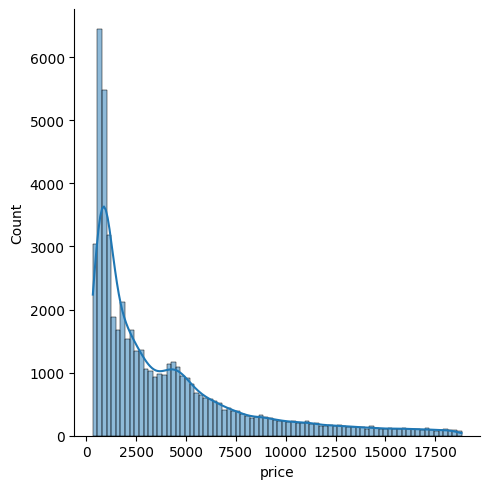

In [ ]:
sb.displot(diamonds.price,kde=True)
# The distribution of prices

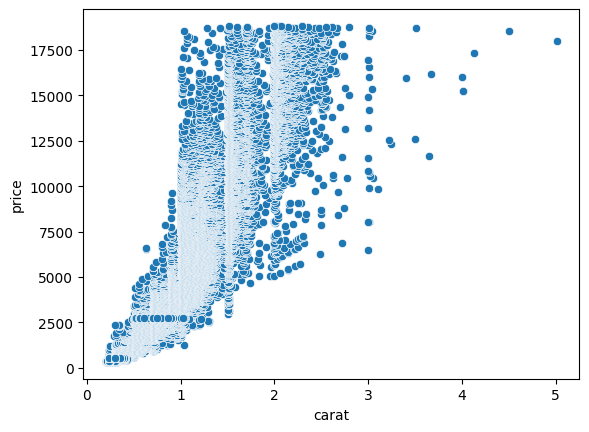

In [ ]:
# Price by Carat
sb.scatterplot(x='carat', y='price', data=diamonds)
plt.show()  
# The price of a diamond increases with the carat                  

C:\Users\ASUS1\AppData\Local\Temp\ipykernel_19860\1793686106.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.boxplot(x='clarity', y='price', data=diamonds, palette=rocket)
C:\Users\ASUS1\AppData\Local\Temp\ipykernel_19860\1793686106.py:2: UserWarning: The palette list has more values (10) than needed (8), which may not be intended.
  sb.boxplot(x='clarity', y='price', data=diamonds, palette=rocket)


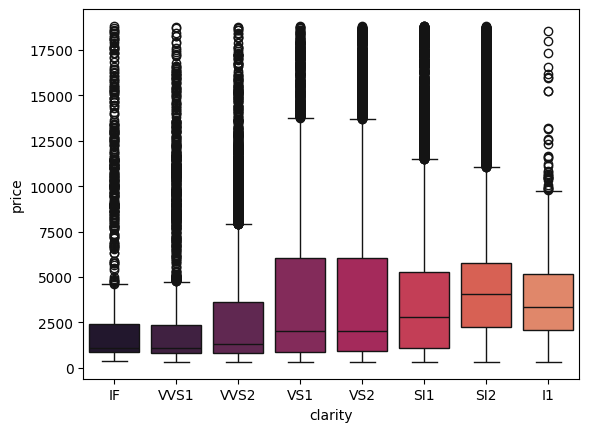

In [ ]:
# Price by Clarity
sb.boxplot(x='clarity', y='price', data=diamonds, palette=rocket)
plt.show() 
# The price of a diamond increases by the clarity type

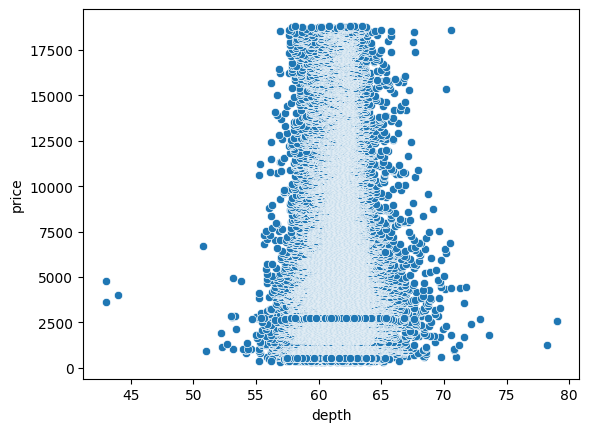

In [ ]:

# Price by Depth
sb.scatterplot(x='depth', y='price', data=diamonds)    
plt.show() 
# The price of a diamond increases by the depth type
            

<Axes: >

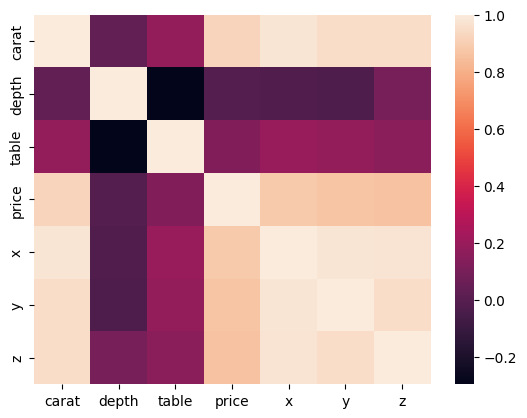

In [ ]:
sb.heatmap(diamonds.corr(numeric_only=True))
# The correlation between the variables

C:\Users\ASUS1\AppData\Local\Temp\ipykernel_19860\1210323487.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.countplot(data=diamonds,x='cut',palette=rocket)
C:\Users\ASUS1\AppData\Local\Temp\ipykernel_19860\1210323487.py:1: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sb.countplot(data=diamonds,x='cut',palette=rocket)


<Axes: xlabel='cut', ylabel='count'>

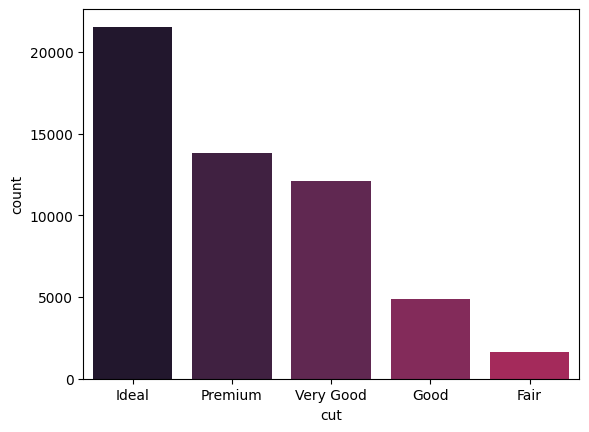

In [ ]:
sb.countplot(data=diamonds,x='cut',palette=rocket)
# The amount of diamonds by cut type

C:\Users\ASUS1\AppData\Local\Temp\ipykernel_19860\2793147522.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sb.countplot(data= diamonds, y="color", palette=rocket)
C:\Users\ASUS1\AppData\Local\Temp\ipykernel_19860\2793147522.py:1: UserWarning: The palette list has more values (10) than needed (7), which may not be intended.
  sb.countplot(data= diamonds, y="color", palette=rocket)


<Axes: xlabel='count', ylabel='color'>

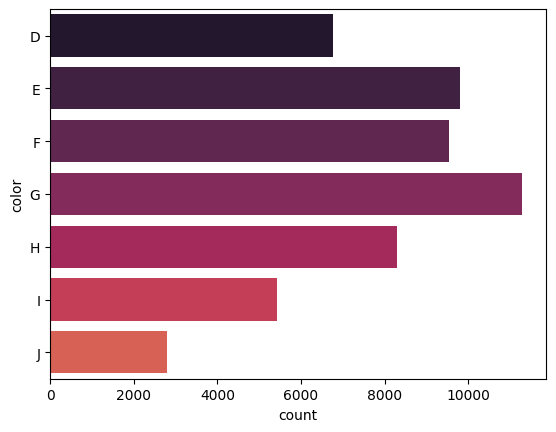

In [ ]:
sb.countplot(data= diamonds, y="color", palette=rocket)
# The amount of diamonds by color 

C:\Users\ASUS1\AppData\Local\Temp\ipykernel_19860\2821932080.py:1: UserWarning: The palette list has more values (10) than needed (7), which may not be intended.
  sb.countplot(data=diamonds,x='cut',hue='color',palette=rocket)


<Axes: xlabel='cut', ylabel='count'>

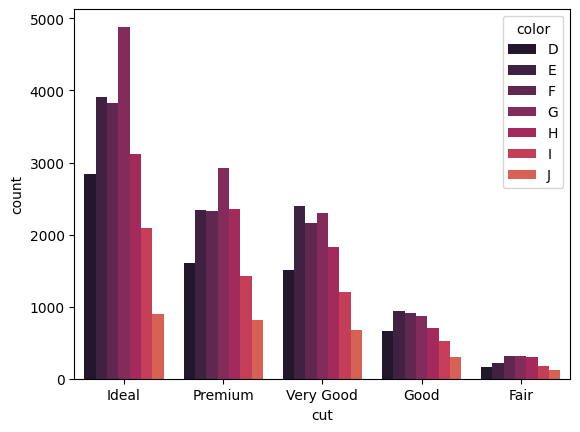

In [ ]:
sb.countplot(data=diamonds,x='cut',hue='color',palette=rocket)
# The amount of diamonds by cut type and color